In [5]:
# Import all libraries
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import numpy as np
import pandas as pd
import pickle
import re
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
import string
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
import warnings

warnings.filterwarnings('ignore')
np.set_printoptions(precision=4)

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
dataset = 'drive/MyDrive/Bangkit 2022/Cleaned_Dataset.csv'

In [77]:
# Load dataset
#data = pd.read_csv('/content/UpdatedResumeDataSet.csv', engine='python')
data = pd.read_csv(dataset) # Comment this line and uncomment the above line if this does not work for you
print(len(data))
#data.head()

10501


**DROP UNNECESSARY COLUMNS**

In [78]:
data = data.drop(['salary', 'education', 'raw_description', 'experience', 'company', 'employment_type'], 1)

In [79]:
data = data.dropna()
data = data.reset_index()
data = data.drop('index', 1)
print(len(data))

9773


In [80]:
data.head()

,description,title,skills
0,Job Description\nTo implement the Head Start P...,Head Start Teacher,Emergency Handling
1,Job Description\nYou have the magic. We have t...,Teacher of English,"Vocabularies, Grammars, Teaching, Lesson Plann..."
2,Job Description\nWe are looking for a CRM deve...,CRM / PHP Developer,"PHP (Scripting Language), Debugging, Web Servi..."
3,Job Description\n\nBriggs Dodge Ram Fiat is lo...,Automotive Service Advisor / Driver,"Driving, Service Delivery, Customer Service, A..."
4,"Job Description\n HARLINGEN, TX- RIO GRANDE VA...",Licensed Nursing Home Administrator,"Emergency Handling, Training, Accounting, Heal..."


**DROP LABELS WHICH HAVING FEW SAMPLES (OPTIONAL)**

In [34]:
# Print unique categories of resumes
kategori = dict(data['title'].value_counts())
print(kategori)
print(len(kategori))

{'CUSTOMER SERVICE REPRESENTATIVE': 205, 'SALES FLOOR ASSOCIATE': 200, 'Flatbed Truck Driving Job -  ': 110, 'Sales Representative': 89, 'KFC Team Member': 79, 'Retail Counter Sales': 75, 'CDL A Delivery Truck Driver  ': 67, 'ONLINE MEDICAL BILLING & CODING TRAINING  ': 64, 'Parts Delivery': 56, 'Merchandise Associate': 54, 'Customer Service Representative': 52, 'Local CDL A Truck Driver': 42, 'Hiring Van & Company Drivers  ': 42, 'MEDICAL BILLING & CODING CAREER TRAINING ': 39, 'Staff Accountant': 39, 'CDL A Truck Driver  ': 35, ' Medical Assistant': 33, 'Sales Executive  ': 33, 'Warehouse Associate': 33, 'Administrative Assistant': 33, 'Real Estate Agent  ': 31, 'CDL A Local Delivery Truck Driver  ': 30, 'Retail Merchandiser': 29, 'Machine Operator': 29, 'Sr. Accountant': 26, 'ONLINE CRIMINAL JUSTICE CAREER TRAINING  ': 25, 'Warehouse Worker  ': 25, 'Dental Assistant (General Dentistry Practice)': 25, 'MEDICAL ASSISTANT CAREER TRAINING - LOCAL MEDICAL TRAINING AVAILABLE': 25, 'Life I

In [35]:
buang = []

for x in kategori:
  if kategori[x] < 10:
    buang.append(x)

print(buang)
print(len(buang))

['Retail Sales Associate', 'Sales Representative - In Person/ ', 'Company Driver Job', 'Data Analyst', 'Maintenance Mechanic', 'Housekeeper', '13J Fire Control Specialist', 'Pharmacy Technician', 'Licensed Real Estate Professional', 'Dentist - DDS / DMD', 'Warehouse Laborer  ', 'Paralegal', 'Class A CDL - Over-the-Road (OTR) Truck Driver', '88M Truck Driver', 'Payroll Administrator', 'Account Executive', 'Manufacturing Associate', 'Dedicated Route Driving Job', 'Financial Analyst', 'Accounting Manager', 'Medical Assistant', 'Restaurant Team Member', 'Restaurant General Manager', 'Physical Therapist - Travel Contract', 'Project Coordinator', '42A Human Resources Specialist', 'Patient Care Assistant', 'Amazon Warehouse Assistant    ', 'Independent Sales Representative - Part-Time/Flex Schedule', 'Assembler', 'Transportation Security Officer (TSO)', 'Warehouse', 'Maintenance Supervisor', 'Mac Tools Route Sales / Outside Sales Distributor - Full Training', 'Automotive Technician', "Real Es

In [36]:
for x in buang:
  kategori.pop(x)

In [37]:
print(kategori)
print(len(kategori))

{'CUSTOMER SERVICE REPRESENTATIVE': 205, 'SALES FLOOR ASSOCIATE': 200, 'Flatbed Truck Driving Job -  ': 110, 'Sales Representative': 89, 'KFC Team Member': 79, 'Retail Counter Sales': 75, 'CDL A Delivery Truck Driver  ': 67, 'ONLINE MEDICAL BILLING & CODING TRAINING  ': 64, 'Parts Delivery': 56, 'Merchandise Associate': 54, 'Customer Service Representative': 52, 'Local CDL A Truck Driver': 42, 'Hiring Van & Company Drivers  ': 42, 'MEDICAL BILLING & CODING CAREER TRAINING ': 39, 'Staff Accountant': 39, 'CDL A Truck Driver  ': 35, ' Medical Assistant': 33, 'Sales Executive  ': 33, 'Warehouse Associate': 33, 'Administrative Assistant': 33, 'Real Estate Agent  ': 31, 'CDL A Local Delivery Truck Driver  ': 30, 'Retail Merchandiser': 29, 'Machine Operator': 29, 'Sr. Accountant': 26, 'ONLINE CRIMINAL JUSTICE CAREER TRAINING  ': 25, 'Warehouse Worker  ': 25, 'Dental Assistant (General Dentistry Practice)': 25, 'MEDICAL ASSISTANT CAREER TRAINING - LOCAL MEDICAL TRAINING AVAILABLE': 25, 'Life I

In [38]:
#print(kategori.keys())
for x in buang:
  data = data[data.title != x]

In [39]:
data = data.reset_index()

In [ ]:
#data.head()

**BACK INTO THE MAIN**

In [81]:
data_size = len(data)
print(data_size)

9773


In [ ]:
#data.head()

In [41]:
# Get set of stopwords
from nltk.corpus import stopwords
stopwords_set = set(stopwords.words('english')+['``',"''"])

In [42]:
# Function to clean resume text
def clean_text(text, id):
    text = re.sub('http\S+\s*', ' ', text)  # remove URLs
    text = re.sub('RT|cc', ' ', text)  # remove RT and cc
    text = re.sub('#\S+', '', text)  # remove hashtags
    text = re.sub('@\S+', '  ', text)  # remove mentions
    text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@
    [\]^_`{|}~"""), ' ', text)  # remove punctuations
    text = re.sub(r'[^\x00-\x7f]',r' ', text) 
    text = re.sub('\s+', ' ', text)  # remove extra whitespace
    text = text.lower()  # convert to lowercase
    if id == 1:
      text = re.sub('job', '', text)
      text = re.sub('work', '', text)
      text = re.sub('experience', '', text)
      text = re.sub('skills', '', text)
      text = re.sub('description', '', text)
      text = re.sub('requirements', '', text)
      text = re.sub('ability', '', text)
    text_tokens = word_tokenize(text)  # tokenize
    filtered_text = [w for w in text_tokens if not w in stopwords_set]
    # remove stopwords
    return ' '.join(filtered_text)

In [43]:
# Print a sample original feature and label
print(data['description'][1089])
print(data['title'][1089])

Job Description
O'Reilly is now hiring Retail Counter Sales team members. Our sales team members are responsible for providing our retail and installer customers with a high level of service. They also support management in the accomplishment of all assigned tasks, including maintaining inventory control, store appearance, and customer relations. Essential Job Functions:Greet and advise customers in selection of products and their usesProcess customer returns and resolve customer complaintsAssist with inventory and processing of incoming stockPerform value added services, i.e., test batteries, carry merchandise to customer cars, install wipers, etc.Handle cash and credit card transactions while properly maintaining a cash drawerQualifications:Ability to provide outstanding, friendly, and professional customer serviceAbility to quickly match alphanumeric sequencesMust be able to multitaskFamiliarity with automotive parts, cataloging, and automotive sales or service is desired but not re

In [44]:
# Clean the description
data['cleaned_description'] = data.description.apply(lambda x: clean_text(x, 1))
print(data['cleaned_description'][0])

data['cleaned_title'] = data.title.apply(lambda x: clean_text(x, 2))
print(data['cleaned_title'][0])

come us spencer spirit halloween ing best brightest colleagues help us deliver fun product possible guests fast paced take seriously always good laugh end day walk stores halls corporate office see firsthand laidback irreverent firm believers true tattoos piercings common water cooler convos whether critiquing new exclusive costumes quality testing newly implemented software technology teams understand importance ing collaboratively challenge status quo achieve goals keep pushing go beyond looking top talent become part team check benefits competitive salary incentive opportunity career advancement 30 discount merchandise responsibilities responsible selling store merchandise guests maintaining company standard customer service demonstrates merchandise ording company guidelines product knowledge operates store pos ring sales assists merchandising stocking general upkeep store education required looking creative high energy fun people great customer service qualified candidates least 1 

In [45]:
# Get features and labels from data and shuffle
features = data['cleaned_description'].values
#print(features)
original_labels = data['cleaned_title'].values
#print(original_labels)
labels = original_labels[:]
#print(labels[1089])

for i in range(data_size):
  labels[i] = str(labels[i].lower())  # convert to lowercase
  labels[i] = labels[i].replace(" ", "")  # use hyphens to convert multi-token labels into single tokens
#print(labels)

import random
random.seed(20)
features, labels = shuffle(features, labels, random_state=20)

# Print example feature and label
print(features[0])
print(labels[0])

join one fastest growing privately held media companies north america recognized year year outstanding growth positive culture opportunity us best version media bvm brings neighborhoods together providing superior quality professional publication reflects integrity pride prestige local communities serve reach readers company industry providing highest quality magazines micro targeted markets proudly serve 925 magazines print mailed 34 million magazines residents across us canada 2020 bvm provides local businesses target affluent influential neighborhood markets across north america salespeople known publishers sell ads create sense community among neighborhood residents build lasting relationships local advertisers looking looking candidates energetic motivated entrepreneurial spirit mindset action results driven old school ethic independently autonomously yet courageous enough ask questions learn others strong sales stamina desire make connections enjoy building relationships others b

In [46]:
# Split for train and test
train_split = 0.8
train_size = int(train_split * data_size)

train_features = features[:train_size]
train_labels = labels[:train_size]

test_features = features[train_size:]
test_labels = labels[train_size:]

# Print size of each split
print(len(train_labels))
print(len(test_labels))

2232
558


In [48]:
# Tokenize feature data and print word dictionary
vocab_size = 10000
oov_tok = '<OOV>'

feature_tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
feature_tokenizer.fit_on_texts(train_features)

feature_index = feature_tokenizer.word_index
print(dict(list(feature_index.items())))

# Print example sequences from train and test datasets
train_feature_sequences = feature_tokenizer.texts_to_sequences(train_features)
print(train_feature_sequences[0])

test_feature_sequences = feature_tokenizer.texts_to_sequences(test_features)
print(test_feature_sequences[0])

{'<OOV>': 1, 'customer': 2, 'time': 3, 'team': 4, 'medical': 5, 'store': 6, 'training': 7, 'career': 8, 'service': 9, 'customers': 10, 'company': 11, 'nbsp': 12, 'amazon': 13, 'health': 14, 'provide': 15, 'get': 16, 'sales': 17, 'day': 18, 'benefits': 19, 'pay': 20, 'environment': 21, 'home': 22, 'must': 23, 'safety': 24, 'ing': 25, 'drivers': 26, 'duties': 27, 'opportunity': 28, 'years': 29, 'position': 30, 'new': 31, 'high': 32, 'merchandise': 33, 'cash': 34, 'paid': 35, 'safe': 36, 'link': 37, 'removed': 38, 'us': 39, 'one': 40, 'include': 41, 'industry': 42, '000': 43, 'business': 44, 'earn': 45, 'support': 46, 'shift': 47, 'full': 48, 'available': 49, 'required': 50, 'assigned': 51, 'associates': 52, 'people': 53, 'services': 54, 'learn': 55, 'individuals': 56, 'delivery': 57, 'great': 58, 'clean': 59, 'employment': 60, 'hours': 61, 'level': 62, 'part': 63, 'today': 64, 'family': 65, 'including': 66, 'chalk': 67, 'retail': 68, 'responsible': 69, 'may': 70, 'ounting': 71, 'manageme

In [49]:
# Tokenize label data and print label dictionary
label_tokenizer = Tokenizer(lower=True)
label_tokenizer.fit_on_texts(labels)

label_index = label_tokenizer.word_index
print(dict(list(label_index.items())))

# Print example label encodings from train and test datasets
train_label_sequences = label_tokenizer.texts_to_sequences(train_labels)
print(train_label_sequences[0])

test_label_sequences = label_tokenizer.texts_to_sequences(test_labels)
print(test_label_sequences[0])

{'customerservicerepresentative': 1, 'salesfloorassociate': 2, 'flatbedtruckdrivingjob': 3, 'salesrepresentative': 4, 'kfcteammember': 5, 'retailcountersales': 6, 'cdldeliverytruckdriver': 7, 'onlinemedicalbillingcodingtraining': 8, 'partsdelivery': 9, 'merchandiseassociate': 10, 'localcdltruckdriver': 11, 'hiringvancompanydrivers': 12, 'warehouseworker': 13, 'staffountant': 14, 'medicalbillingcodingcareertraining': 15, 'cdltruckdriver': 16, 'salesexecutive': 17, 'warehouseassociate': 18, 'medicalassistant': 19, 'administrativeassistant': 20, 'realestateagent': 21, 'cdllocaldeliverytruckdriver': 22, 'machineoperator': 23, 'amazonwarehouseattendant': 24, 'retailmerchandiser': 25, 'amazonwarehousingworker': 26, 'srountant': 27, 'dentalassistantgeneraldentistrypractice': 28, 'medicalassistantcareertraininglocalmedicaltrainingavailable': 29, 'onlinecriminaljusticecareertraining': 30, 'securityofficer': 31, 'lifeinsuranceagent': 32, 'outsidesalesrepresentative': 33, 'registerednurse': 34, '

In [50]:
# Pad sequences for feature data
max_length = 200
trunc_type = 'post'
pad_type = 'post'

train_feature_padded = pad_sequences(train_feature_sequences, maxlen=max_length, padding=pad_type, truncating=trunc_type)
test_feature_padded = pad_sequences(test_feature_sequences, maxlen=max_length, padding=pad_type, truncating=trunc_type)

# Print example padded sequences from train and test datasets
#print(train_feature_padded[0])
#print(test_feature_padded[0])

In [51]:
# Model
embedding_dim = 32
num_categories = len(label_index) + 1

model = tf.keras.Sequential([
  tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length),
  #tf.keras.layers.GlobalMaxPooling1D(),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim, return_sequences=True)),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(int(embedding_dim/2))),
  # use ReLU in place of tanh function since they are very good alternatives of each other.
  tf.keras.layers.Dense(128, activation='relu'),
  # Add a Dense layer with 25 units and softmax activation for probability distribution
  tf.keras.layers.Dense(num_categories, activation='softmax'),])

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 200, 32)           320000    
                                                                 
 bidirectional_2 (Bidirectio  (None, 200, 64)          16640     
 nal)                                                            
                                                                 
 bidirectional_3 (Bidirectio  (None, 32)               10368     
 nal)                                                            
                                                                 
 dense_2 (Dense)             (None, 128)               4224      
                                                                 
 dense_3 (Dense)             (None, 107)               13803     
                                                                 
Total params: 365,035
Trainable params: 365,035
Non-tr

In [52]:
# Compile the model and convert train/test data into NumPy arrays
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Features
train_feature_padded = np.array(train_feature_padded)
test_feature_padded = np.array(test_feature_padded)

# Labels
train_label_sequences = np.array(train_label_sequences)
test_label_sequences = np.array(test_label_sequences)

In [53]:
# Train the neural network
num_epochs = 100

history = model.fit(train_feature_padded, train_label_sequences, epochs=num_epochs, shuffle = True, validation_data=(test_feature_padded, test_label_sequences), verbose=2)

Epoch 1/100
70/70 - 9s - loss: 4.1832 - accuracy: 0.1532 - val_loss: 3.3355 - val_accuracy: 0.2043 - 9s/epoch - 127ms/step
Epoch 2/100
70/70 - 2s - loss: 2.9027 - accuracy: 0.3020 - val_loss: 2.5025 - val_accuracy: 0.3889 - 2s/epoch - 27ms/step
Epoch 3/100
70/70 - 2s - loss: 2.2209 - accuracy: 0.4113 - val_loss: 1.9548 - val_accuracy: 0.4910 - 2s/epoch - 28ms/step
Epoch 4/100
70/70 - 2s - loss: 1.8338 - accuracy: 0.4928 - val_loss: 1.7019 - val_accuracy: 0.5645 - 2s/epoch - 28ms/step
Epoch 5/100
70/70 - 2s - loss: 1.4541 - accuracy: 0.5981 - val_loss: 1.5371 - val_accuracy: 0.5717 - 2s/epoch - 28ms/step
Epoch 6/100
70/70 - 2s - loss: 1.2523 - accuracy: 0.6447 - val_loss: 1.4135 - val_accuracy: 0.6398 - 2s/epoch - 28ms/step
Epoch 7/100
70/70 - 2s - loss: 1.0737 - accuracy: 0.6967 - val_loss: 1.2655 - val_accuracy: 0.6864 - 2s/epoch - 28ms/step
Epoch 8/100
70/70 - 2s - loss: 0.9488 - accuracy: 0.7267 - val_loss: 1.2023 - val_accuracy: 0.7097 - 2s/epoch - 28ms/step
Epoch 9/100
70/70 - 2s 

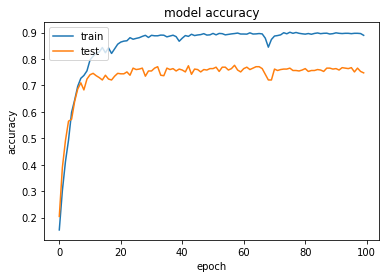

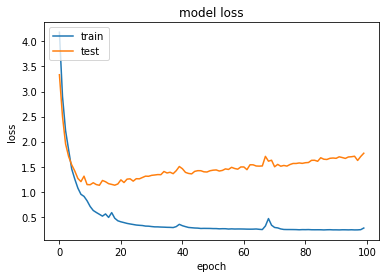

In [54]:
# Plot the training and validation loss 
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**PREDICTION**

In [55]:
# Save reverse dictionary of labels to encodings
label_to_encoding = dict(list(label_index.items()))
print(label_to_encoding)

encoding_to_label = {}
for k, v in label_to_encoding.items():
  encoding_to_label[v] = k
print(encoding_to_label)

{'customerservicerepresentative': 1, 'salesfloorassociate': 2, 'flatbedtruckdrivingjob': 3, 'salesrepresentative': 4, 'kfcteammember': 5, 'retailcountersales': 6, 'cdldeliverytruckdriver': 7, 'onlinemedicalbillingcodingtraining': 8, 'partsdelivery': 9, 'merchandiseassociate': 10, 'localcdltruckdriver': 11, 'hiringvancompanydrivers': 12, 'warehouseworker': 13, 'staffountant': 14, 'medicalbillingcodingcareertraining': 15, 'cdltruckdriver': 16, 'salesexecutive': 17, 'warehouseassociate': 18, 'medicalassistant': 19, 'administrativeassistant': 20, 'realestateagent': 21, 'cdllocaldeliverytruckdriver': 22, 'machineoperator': 23, 'amazonwarehouseattendant': 24, 'retailmerchandiser': 25, 'amazonwarehousingworker': 26, 'srountant': 27, 'dentalassistantgeneraldentistrypractice': 28, 'medicalassistantcareertraininglocalmedicaltrainingavailable': 29, 'onlinecriminaljusticecareertraining': 30, 'securityofficer': 31, 'lifeinsuranceagent': 32, 'outsidesalesrepresentative': 33, 'registerednurse': 34, '

In [69]:
# Create padded sequence for example
skills = 'Drive a car or truck'
example_sequence = feature_tokenizer.texts_to_sequences([skills])
example_padded = pad_sequences(example_sequence, maxlen=max_length, padding=pad_type, truncating=trunc_type)
example_padded = np.array(example_padded)
print(example_padded)

[[ 295    1 2575    1  168    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0   

In [70]:
# Make a prediction
prediction = model.predict(example_padded)

In [71]:
# Verify that prediction has correct format
print(prediction[0])
print(len(prediction[0]))  
print(np.sum(prediction[0]))  # should be 1

[1.8533e-14 2.9055e-16 3.0758e-18 7.0440e-11 2.8532e-03 4.5791e-08
 1.1814e-13 6.3979e-21 5.7843e-04 1.3272e-13 1.5615e-17 1.0665e-20
 5.2193e-20 3.1471e-20 3.6053e-12 5.1600e-05 1.1946e-21 3.9551e-17
 1.3433e-20 2.3817e-05 1.0698e-06 7.4103e-16 4.2367e-22 2.6244e-03
 0.0000e+00 4.7115e-25 9.7148e-26 4.7123e-03 5.4323e-22 1.5730e-08
 3.0791e-01 3.8121e-10 1.6512e-08 1.6406e-07 9.3947e-16 9.8604e-28
 5.8479e-12 7.4161e-15 1.6685e-22 3.5980e-25 4.1247e-08 4.8810e-32
 3.1668e-05 5.2766e-38 1.8255e-29 1.8615e-25 2.9392e-31 1.3593e-12
 2.1704e-20 1.5245e-23 3.3302e-17 6.9323e-15 1.3782e-20 1.4600e-09
 7.6308e-30 2.9441e-21 1.4102e-04 1.9906e-09 3.4757e-09 0.0000e+00
 1.9806e-03 1.7369e-08 2.6329e-12 9.1358e-13 6.0946e-09 2.9274e-06
 4.0003e-12 6.7247e-01 5.8849e-06 1.0572e-08 8.7818e-18 6.5874e-03
 3.4394e-14 1.1013e-12 1.4045e-11 5.8166e-26 6.6023e-11 4.2836e-16
 1.4817e-12 3.9335e-20 1.0989e-10 3.3421e-28 2.7329e-18 2.2138e-10
 1.7874e-17 1.0799e-05 1.6284e-13 2.1387e-12 2.3609e-28 8.8547

In [72]:
# Find maximum value in prediction and its index
print(max(prediction[0]))  # confidence in prediction (as a fraction of 1)
print(np.argmax(prediction[0])) 

0.67247105
67


In [73]:
# Indices of top 5 most probable solutions
indices = np.argpartition(prediction[0], -5)[-5:]
indices = indices[np.argsort(prediction[0][indices])]
indices = list(reversed(indices))
print(indices)

[67, 30, 71, 27, 4]


In [74]:
for x in indices:
  print(encoding_to_label[x])

businessanalyst
onlinecriminaljusticecareertraining
ountmanager
srountant
salesrepresentative


In [68]:
# Save model
model.save('model.h5')

**LOAD THE MODEL**

In [ ]:
load_model = tf.keras.models.load_model('drive/MyDrive/Bangkit 2022/Capstone Project/Final Method/model_ver1.h5')

**EXTRAS**

In [ ]:
# Define the neural network
number_of_labels = len(label_index)
embedding_dim = 64

model = tf.keras.Sequential([
  # Add an Embedding layer expecting input vocab of size 6000, and output embedding dimension of size 64 we set at the top
  tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=300),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
  #tf.keras.layers.Dense(embedding_dim, activation='relu'),

  # use ReLU in place of tanh function since they are very good alternatives of each other.
  #tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(embedding_dim, activation='relu'),

  # Add a Dense layer with 25 units and softmax activation for probability distribution
  tf.keras.layers.Dense(number_of_labels, activation='softmax')
])

model.summary()